# **Importing Libraries**



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# **Mounting My Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing os module
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/gender_submission.csv
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/test.csv
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/train.csv
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/drug200.csv
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/Task0_Titanic_Exploration.ipynb
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/Task1a1_Data_Classification_Model
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/CarPrice_Assignment.csv
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/Data Dictionary - carprices.xlsx
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/model2.pkl
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/model1.pkl
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/Task_2_Regression_Model
/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/Task1a_Data_Classification_Model.ipynb


# **Importing Data_Sheet**(.csv Formate)

In [5]:
df = pd.read_csv("/content/drive/MyDrive/DATA_ANALYTICS_CLUB /ASSIGMENT 1/drug200.csv")

# **Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically.**
# **Data table display for Pandas dataframes can be enabled by running:**


In [6]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# **Reading_and_Prechecking_Data**

In [7]:
df.head() #Displaying head enteries

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

In [8]:
df.describe()

Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

# **Disabling Formator**

In [9]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [10]:
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

# **Checking Missing Vaules**

In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# **Variable_Descripton**
* Age: Age of patient
* Sex: Gender of patient
* BP: Blood pressure of patient
* Cholesterol: Cholesterol of patient
* Na_to_K: Sodium to Potassium Ratio in Blood
* Drug: Drug Type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# **Droping columns With 50% data (Most usefull for large data set)**

In [13]:
df=df.dropna(thresh=0.5,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# **Univariate Variable Analysis**

# **1) Age**

In [14]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


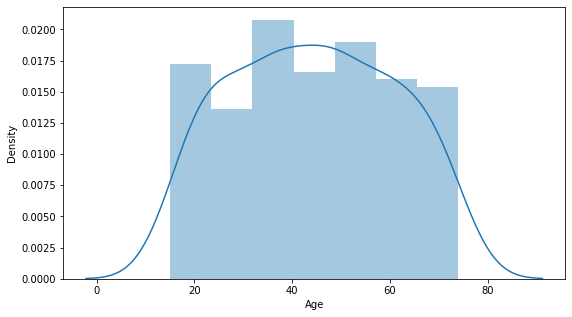

In [15]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

# **2) Sex Variable**

In [16]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

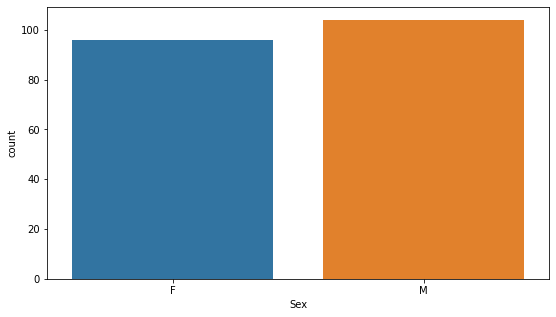

In [17]:
# Sex Distribution

plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

# **3) BP Variable**

In [18]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

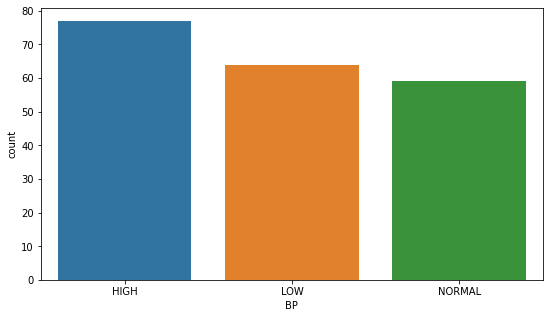

In [19]:
#BP Distribution
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

# **3) Cholestrol Variable**

In [20]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

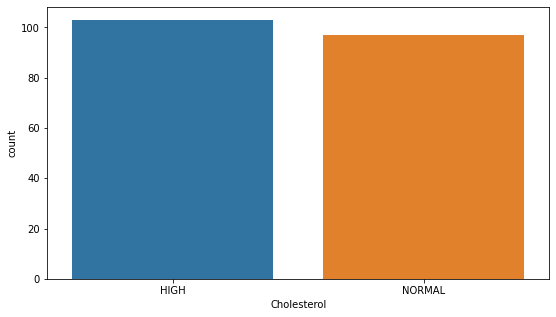

In [21]:
# Cholestrol Distribution
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

# **4) Na_to_K Variable**

In [22]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


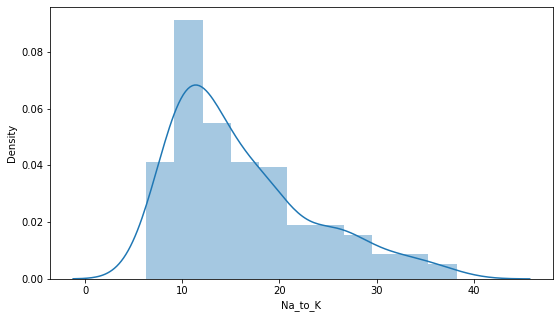

In [23]:
# Na_to_K Variable Distribution
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

# **5) Drug Variable**

In [24]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

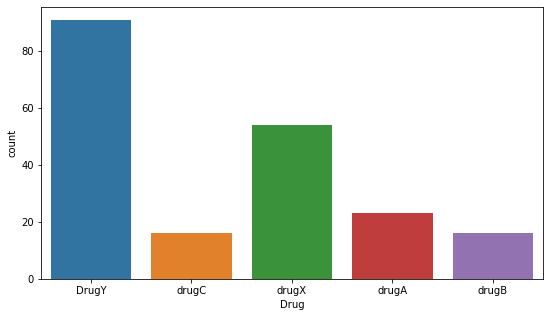

In [25]:
# Drug Variable Distribution
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

# **Data_Encoding**

# **Seperatiting_Categorical_variables**

In [26]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

Sex      BP Cholesterol   Drug
0   F    HIGH        HIGH  DrugY
1   M     LOW        HIGH  drugC
2   M     LOW        HIGH  drugC
3   F  NORMAL        HIGH  drugX
4   F     LOW        HIGH  DrugY

# **Find and Replace**

In [27]:
cleanup_nums = {"Sex":{"F": 1, "M": 0},"BP": {"HIGH":1,"LOW":0,"NORMAL":-1},"Cholesterol": {"HIGH":1,"NORMAL":0},"Drug": {"drugA":1,"drugB":2,"drugC":3,"drugX":4,"DrugY":5}}

In [28]:
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

Sex  BP  Cholesterol  Drug
0    1   1            1     5
1    0   0            1     3
2    0   0            1     3
3    1  -1            1     4
4    1   0            1     5

In [29]:
obj_df.dtypes

Sex            int64
BP             int64
Cholesterol    int64
Drug           int64
dtype: object

# **Other methods like**
* **Label Encoding**
# **Syntax**
obj_df["Sex"] = obj_df["Sex"].astype('category')obj_df.dtypes
obj_df["Sex_cat"] = obj_df["Sex"].cat.codesobj_df.head()

* **One Hot Encoding**
# **Syntax**
pd.get_dummies(obj_df, columns=["BP"]).head()
 For Multiple Columns
 pd.get_dummies(obj_df, columns=["Sex", "BP"], prefix ["S", "B"]).head()

 

# **Basic Data Analysis**
* Age -- Drug
* Sex -- Drug
* BP -- Drug
* Cholesterol -- Drug

# **Age -- Drug**

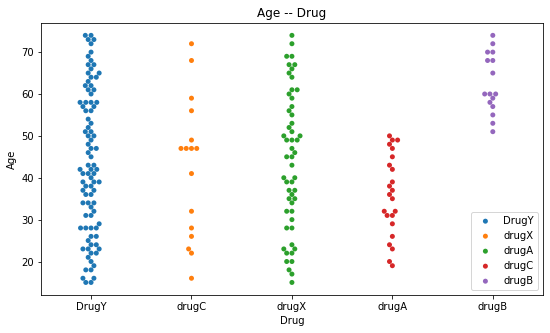

In [30]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [31]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


# **Sex -- Drug**

In [32]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

Drug Sex  Count
0  DrugY   F     47
1  DrugY   M     44
2  drugA   F      9
3  drugA   M     14
4  drugB   F      6
5  drugB   M     10
6  drugC   F      7
7  drugC   M      9
8  drugX   F     27
9  drugX   M     27

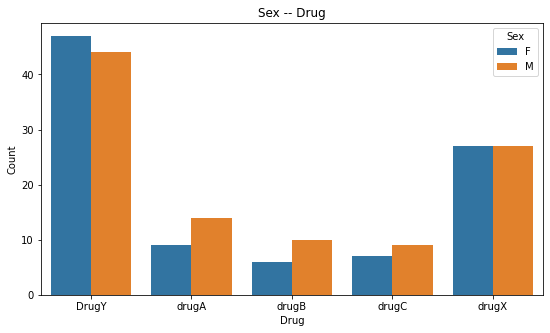

In [33]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

# **BP -- Drug**

In [34]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

Drug      BP  Count
0  DrugY    HIGH     38
1  DrugY     LOW     30
2  DrugY  NORMAL     23
3  drugA    HIGH     23
4  drugB    HIGH     16
5  drugC     LOW     16
6  drugX     LOW     18
7  drugX  NORMAL     36

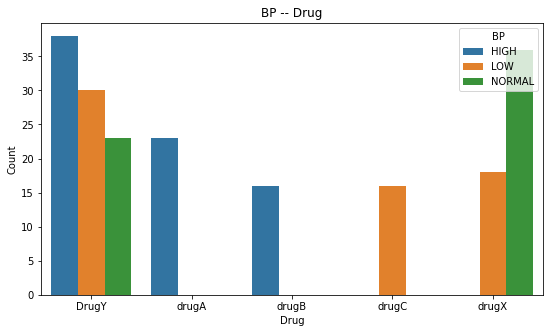

In [35]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

# **Na_to_K -- Drug**

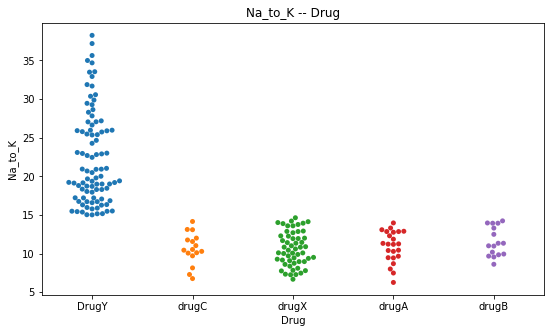

In [36]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

In [37]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


# **Cholesterol -- Drug**

In [38]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

Drug Cholesterol  Count
0  DrugY        HIGH     47
1  DrugY      NORMAL     44
2  drugA        HIGH     12
3  drugA      NORMAL     11
4  drugB        HIGH      8
5  drugB      NORMAL      8
6  drugC        HIGH     16
7  drugX        HIGH     20
8  drugX      NORMAL     34

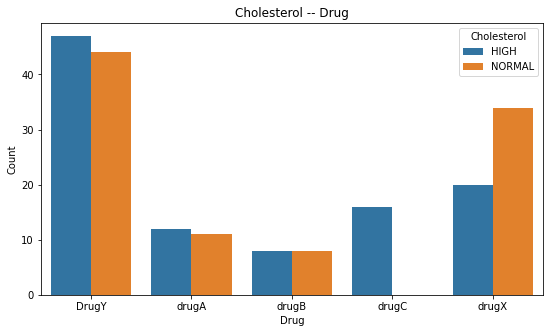

In [39]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

# **Na_to_K -- BP -- Drug**

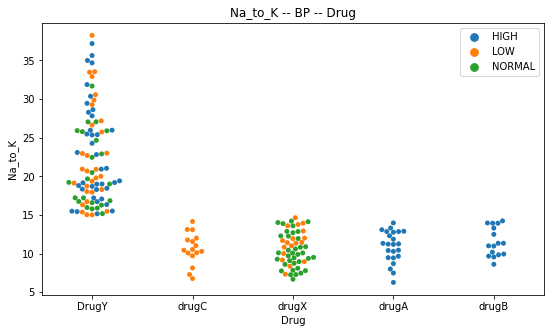

In [40]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

# **Preparing Data and Feature Engineering**

# **Na_to_K_Bigger_Than_15**
If Na_to_K is bigger than 15, it is always drugY.

In [41]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug  Na_to_K_Bigger_Than_15
0   23   F    HIGH        HIGH   25.355  DrugY                       1
1   47   M     LOW        HIGH   13.093  drugC                       0
2   47   M     LOW        HIGH   10.114  drugC                       0
3   28   F  NORMAL        HIGH    7.798  drugX                       0
4   61   F     LOW        HIGH   18.043  DrugY                       1

In [42]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

Drug  Na_to_K_Bigger_Than_15  Count
0  DrugY                       1     91
1  drugA                       0     23
2  drugB                       0     16
3  drugC                       0     16
4  drugX                       0     54

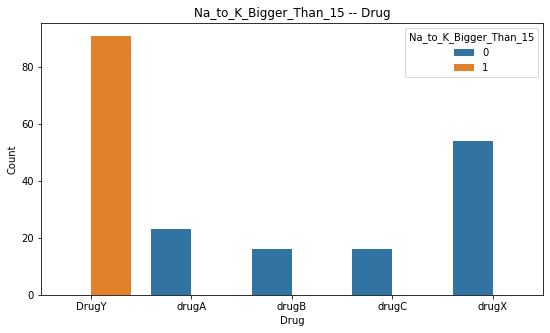

In [43]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

# **Label Encoding**
We will convert from object to int64

* Sex
* BP
* Cholesterol
* Na_to_K
* Na_to_K_Bigger_Than_15

In [44]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [45]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [46]:
df.head()

Age  Sex  BP  Cholesterol  Na_to_K  Drug  Na_to_K_Bigger_Than_15
0   23    0   0            0      167     0                       1
1   47    1   1            0       89     3                       0
2   47    1   1            0       43     3                       0
3   28    0   2            0       10     4                       0
4   61    0   1            0      133     0                       1

# **Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1) #Reshaping Data in a 1D array of the Drug Column
y_test = y_test.values.reshape(-1,1)   #Reshaping Data in a 1D array of the Drug Column

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


# **Model Implementation**

I will try three models and compare their results. For all models, I apply GridSearchCV method to find best score. Also, to be sure our models performance are random, I will use 5 Fold Cross Validation method.

In [48]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

# **KNN Classifier**
To find best score of KNN model, I will try different value of n_neighbors, p, and weights parameters.
In this kernel, parameters of KNN Algorithm are described and effects of these paremeters on result are observed. First prediction is predicted with default parameters and this result is used for comparing. After that, best value of every parameters are found and are discussed their effects on result.

Finally, GridSearch algorithm is used to find best values of each parameters. So results can be compared each other in the conclusion part.

**Default_Parameters**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.59375
Test Score: 0.65


In [50]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

# **GridSearchCV**

In [51]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train Score: 0.75625
Test Score: 0.7


# **Random Forest**
To find best score of Random Forest model, I will try different value of n_estimators and criterion parameters.

**Default Parameters**

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.98125
Test Score: 0.975


In [53]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

**GridSearchCV**

In [54]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

Hyperparameters: {'criterion': 'entropy', 'n_estimators': 100}
Train Score: 0.9875
Test Score: 0.975


In [55]:
result_dict_train["Random Forest GridSearch Train Score"] = rf_cv.best_score_
result_dict_test["Random Forest GridSearch Test Score"] = rf_cv.score(x_test,y_test)

# **SVM Classifier**
To find best score of SVM model, I will try different value of C, kernel, degree and gamma parameters. The easy way to do this is GridSearchCV method. 

**Default Parameters**

In [56]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.7125
Test Score: 0.65


In [57]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(x_test,y_test)

**GridSearchCV**

In [58]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9875
Test Score: 0.975


In [59]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(x_test,y_test)

# **Conclusion**

In [60]:
#Train Data_Score
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

Score
KNN Default Train Score               0.59375
Random Forest Default Train Score     0.98125
Random Forest GridSearch Train Score  0.98750
SVM Default Train Score               0.71250
SVM GridSearch Train Score            0.98750

In [61]:
#Test_Data_Score
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

Score
KNN Default Test Score               0.650
Random Forest Default Test Score     0.975
Random Forest GridSearch Test Score  0.975
SVM Default Test Score               0.650
SVM GridSearch Test Score            0.975

# **Train and Test_Score Plot**

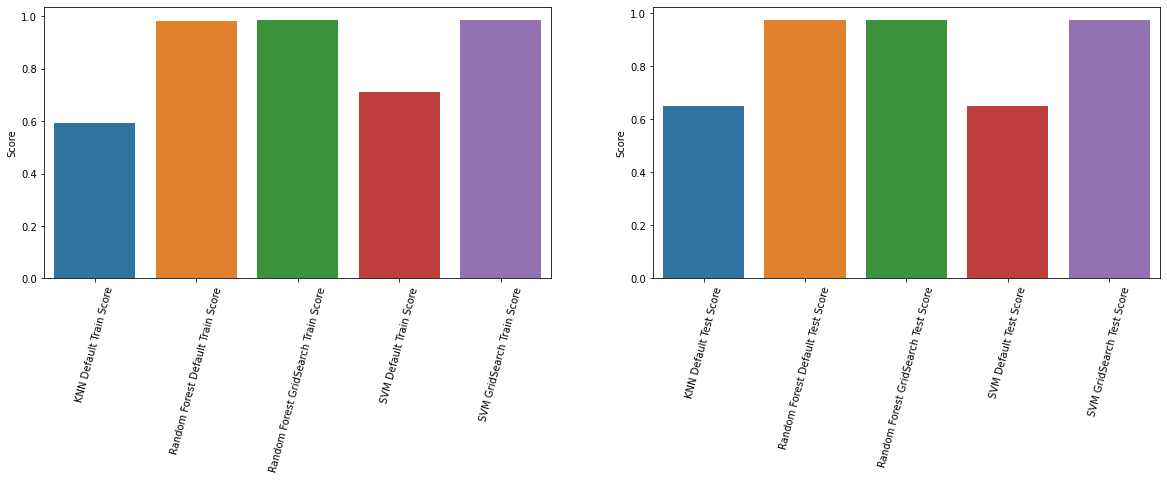

In [62]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

* Random Forest classifier and SVM classifier (after hyperparameter tuning) have a good scores.
* KNN classifier has worst score in three clasifiers.

# **Data_Prediction**

**KNN Model**

In [63]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10,p=1,weights='distance')

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [64]:
data=[y_pred,y_test]
index=["Predict","Test"]
kn=pd.DataFrame(data=data,index=index)
kn

0    1    2    3    4    5    6   ...   33   34   35   36   37   38   39
Predict    4    0    4    2    0    0    0  ...    0    4    0    4    4    0    1
Test     [4]  [0]  [4]  [3]  [0]  [0]  [0]  ...  [0]  [1]  [0]  [4]  [1]  [0]  [1]

[2 rows x 40 columns]

**Random Forest Model**

In [65]:
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest Classifier
rfc = RandomForestClassifier(random_state = 42,criterion='entropy',n_estimators=100)

#Train the model using the training sets
rfc.fit(x_train,y_train)

#Predict the response for test dataset
yr_pred = rfc.predict(x_test)

In [66]:
data=[yr_pred,y_test]
index=["Predict","Test"]
rfp=pd.DataFrame(data=data,index=index)
rfp

0    1    2    3    4    5    6   ...   33   34   35   36   37   38   39
Predict    4    0    4    3    0    0    0  ...    0    1    0    4    1    0    1
Test     [4]  [0]  [4]  [3]  [0]  [0]  [0]  ...  [0]  [1]  [0]  [4]  [1]  [0]  [1]

[2 rows x 40 columns]

**SVM Model**

In [67]:
from sklearn.svm import SVC

#Create SVM Classifier
svc = SVC(C=1,degree=1,gamma=0.01,kernel='linear')

#Train the model using the training sets
svc.fit(x_train,y_train)

#Predict the response for test dataset
ys_pred = svc.predict(x_test)

In [68]:
data=[ys_pred,y_test]
index=["Predict","Test"]
svmp=pd.DataFrame(data=data,index=index)
svmp

0    1    2    3    4    5    6   ...   33   34   35   36   37   38   39
Predict    4    0    4    3    0    0    0  ...    0    1    0    4    1    0    1
Test     [4]  [0]  [4]  [3]  [0]  [0]  [0]  ...  [0]  [1]  [0]  [4]  [1]  [0]  [1]

[2 rows x 40 columns]

# **Pickling Models**

In [69]:
import pickle
  
def storeData():
      
    # Its important to use binary mode
    sdbfile1 = open('model1.pkl', 'ab')
    sdbfile2 = open('model2.pkl', 'ab')
    sdbfile3 = open('model3.pkl', 'ab')
      
    # source, destination
    pickle.dump(knn, sdbfile1)
    pickle.dump(rfc, sdbfile2) 
    pickle.dump(svc, sdbfile3) 
    sdbfile1.close()
    sdbfile2.close()
    sdbfile3.close()
  
if __name__ == '__main__':
    storeData()